# Computer Vision Histograms

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

## Histograms

In [2]:
!ls img/

4.png		      day2.jpg	     night1.jpg  notes.png	     text.png
blue-flowers.jpg      day3.jpg	     night2.jpg  n.png
blue-red-flowers.png  day4.jpg	     night3.png  purple-flowers.jpg
clean-text.jpg	      download.jpeg  night4.jpg  scan.jpg
day1.jpg	      hsv.png	     noisy.png	 sketch.png


In [3]:
# Load some images, calculate and plot their color histograms, one color at the time
# try it with different color spaces BGR, HSV, etc
br_flowers = cv2.imread('./img/blue-red-flowers.png')
day = cv2.imread('./img/day3.jpg')
night = cv2.imread('./img/night2.jpg')

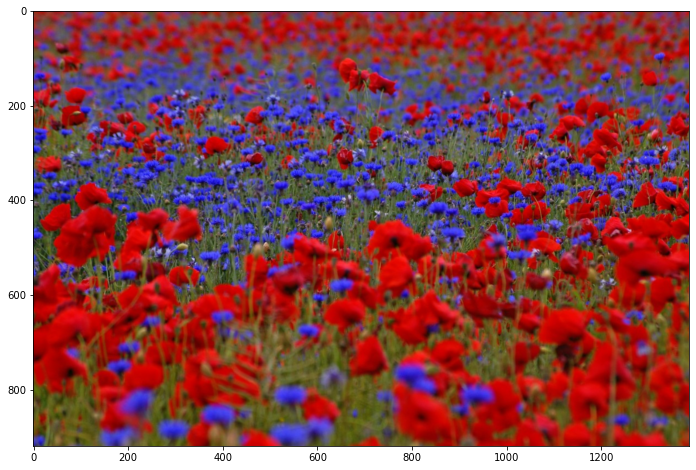

In [4]:
plt.figure(figsize=(12,8))
# img[:, :, ::-1] to flip first and third channels
plt.imshow(cv2.cvtColor(br_flowers, cv2.COLOR_BGR2RGB));

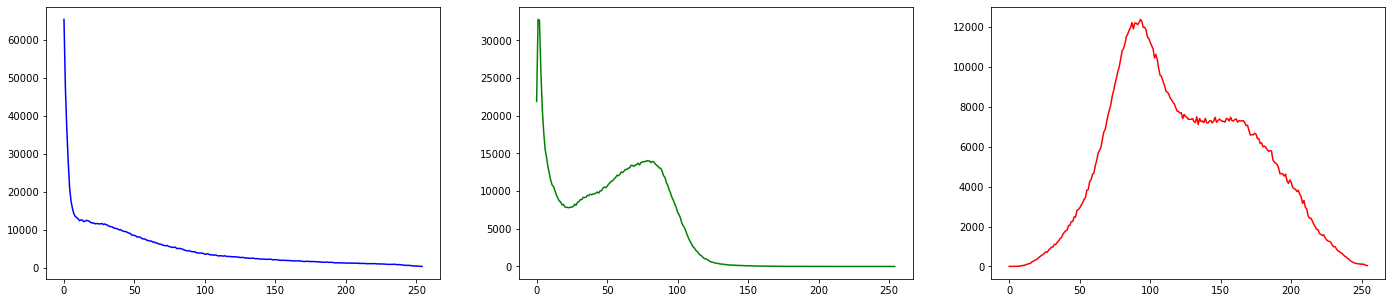

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,5))

blue_hist_fl =cv2.calcHist([br_flowers], [0], None, [255], [0,255])
ax1.plot(blue_hist_fl, color='b')
green_hist_fl =cv2.calcHist([br_flowers], [1], None, [255], [0,255])
ax2.plot(green_hist_fl, color='g')
red_hist_fl =cv2.calcHist([br_flowers], [2], None, [255], [0,255])
ax3.plot(red_hist_fl, color='r')

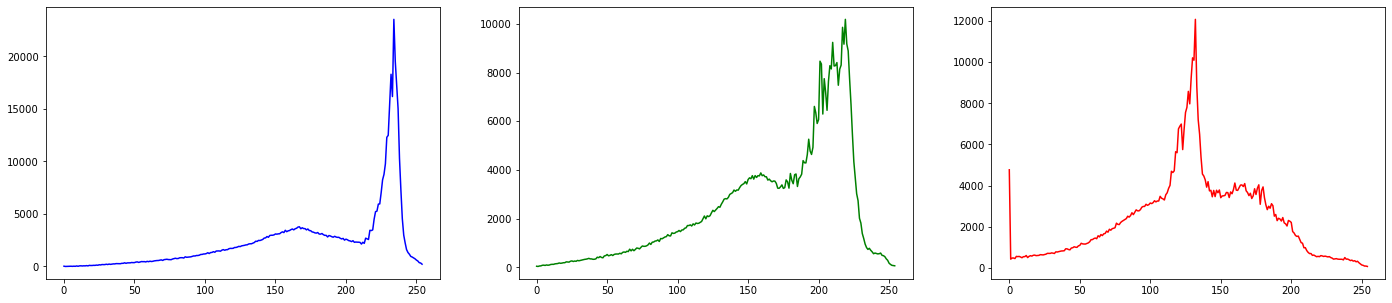

In [16]:
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(24,5))

blue_hist_d =cv2.calcHist([day], [0], None, [255], [0,255])
ax4.plot(blue_hist_d, color='b')
green_hist_d =cv2.calcHist([day], [1], None, [255], [0,255])
ax5.plot(green_hist_d, color='g')
red_hist_d =cv2.calcHist([day], [2], None, [255], [0,255])
ax6.plot(red_hist_d, color='r')

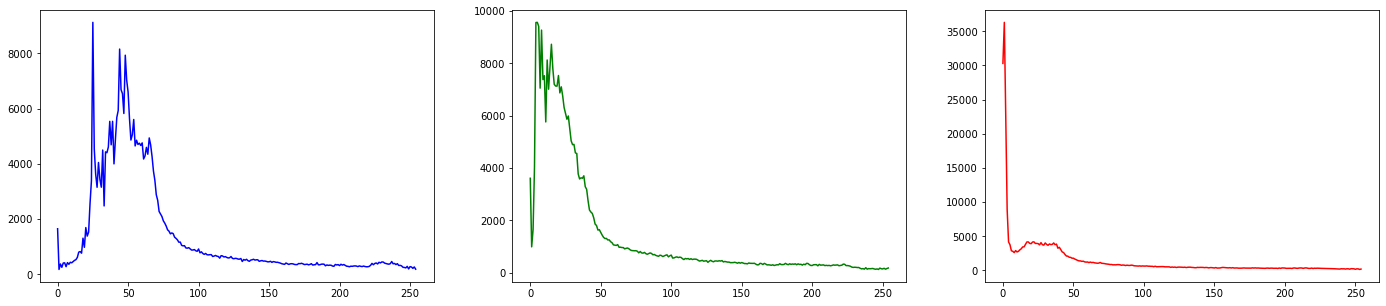

In [17]:
fig, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(24,5))

blue_hist_n = cv2.calcHist([night], [0], None, [255], [0,255])
ax7.plot(blue_hist_n, color='b')
green_hist_n = cv2.calcHist([night], [1], None, [255], [0,255])
ax8.plot(green_hist_n, color='g')
red_hist_n = cv2.calcHist([night], [2], None, [255], [0,255])
ax9.plot(red_hist_n, color='r')

[Hint](# "cv2.calcHist") 


In [18]:
skew(red_hist_n)

array([7.6944], dtype=float32)

In [19]:
# Now try to plot all 3 channels at the same time, does the histogram give you an idea of what the image looks like?


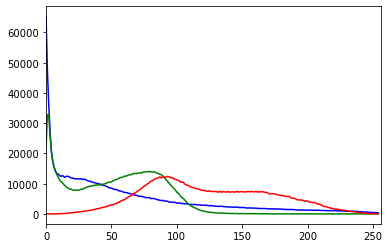

In [20]:
colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([br_flowers], [i], None, [255], [0, 255])
    plt.plot(histogram, color = color)
    plt.xlim(0,256)

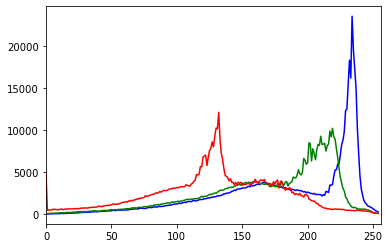

In [21]:
colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([day], [i], None, [255], [0, 255])
    plt.plot(histogram, color = color)
    plt.xlim(0,256)

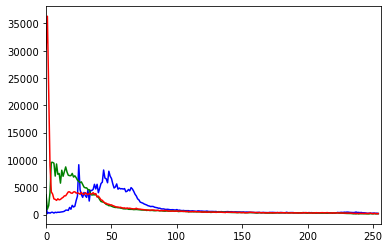

In [22]:
colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    histogram = cv2.calcHist([night], [i], None, [255], [0, 255])
    plt.plot(histogram, color = color)
    plt.xlim(0,256)

## Mini project

### Level 1

#### Image classifier

1. By using only computer vision techniques (no Neural Networks and ML are not allowed) create a binary classifier that can detect if a picutre was taken during the day, you can use the images day/night in the img folder or feel free to add your own images.

In [23]:
!ls img

4.png		      day1.jpg	night1.jpg  noisy.png		scan.jpg
blue-flowers.jpg      day2.jpg	night2.jpg  notes.png		sketch.png
blue-red-flowers.png  day3.jpg	night3.png  n.png		text.png
clean-text.jpg	      day4.jpg	night4.jpg  purple-flowers.jpg


In [5]:

def day_classifier(path):
    test = cv2.imread(path)
    red = cv2.calcHist([test], [2], None, [255], [0, 255])
    return True if skew(red) < 2 else False


In [6]:
day_classifier('./img/day1.jpg')

True

### Level 2

#### Image Classifier

1. This should be an easy one, change the classifier so it can also detect night pictures

In [7]:
def night_classifier(path):
    test = cv2.imread(path)
    red = cv2.calcHist([test], [2], None, [255], [0, 255])
    return True if skew(red) > 2 else False

In [13]:
night_classifier('./img/day1.jpg')

False